## Import Libraries

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## reading file

In [7]:
df = pd.read_csv('/content/best-selling-books.csv')
df.head()

,Book,Author(s),Original language,First published,Approximate sales in millions,Genre
0,A Tale of Two Cities,Charles Dickens,English,1859,200.0,Historical fiction
1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200.0,Novella
2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120.0,Fantasy
3,And Then There Were None,Agatha Christie,English,1939,100.0,Mystery
4,Dream of the Red Chamber (紅樓夢),Cao Xueqin,Chinese,1791,100.0,Family saga


In [3]:
df.head()

,Book,Author(s),Original language,First published,Approximate sales in millions,Genre
0,A Tale of Two Cities,Charles Dickens,English,1859,200.0,Historical fiction
1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200.0,Novella
2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120.0,Fantasy
3,And Then There Were None,Agatha Christie,English,1939,100.0,Mystery
4,Dream of the Red Chamber (紅樓夢),Cao Xueqin,Chinese,1791,100.0,Family saga


In [5]:
df.tail()

,Book,Author(s),Original language,First published,Approximate sales in millions,Genre
169,The Goal,Eliyahu M. Goldratt,English,1984,10.0,NaN
170,Fahrenheit 451,Ray Bradbury,English,1953,10.0,NaN
171,Angela's Ashes,Frank McCourt,English,1996,10.0,NaN
172,The Story of My Experiments with Truth (સત્યના...,Mohandas Karamchand Gandhi,Gujarati,1929,10.0,NaN
173,Bridget Jones's Diary,Helen Fielding,English,1996,10.0,NaN


In [4]:
df.describe()

,First published,Approximate sales in millions
count,174.000000,174.000000
mean,1962.522989,30.097126
std,64.268737,27.957985
min,1304.000000,10.000000
25%,1947.000000,14.000000
50%,1974.000000,20.000000
75%,1995.000000,36.300000
max,2018.000000,200.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Book                           174 non-null    object 
 1   Author(s)                      174 non-null    object 
 2   Original language              174 non-null    object 
 3   First published                174 non-null    int64  
 4   Approximate sales in millions  174 non-null    float64
 5   Genre                          118 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 8.3+ KB


##EDA

## Visualization imports

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

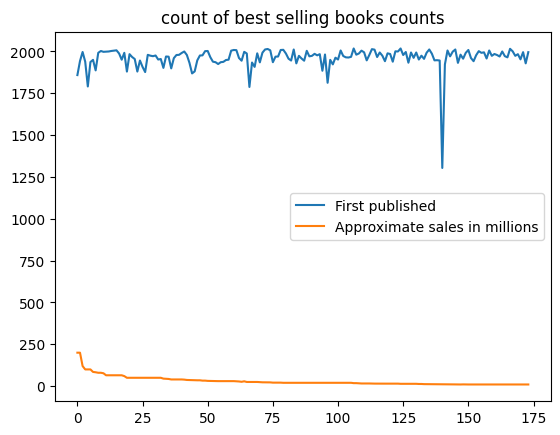

In [8]:
df.plot(kind='line')
plt.title('count of best selling books counts')
plt.show()

In [12]:
best_selling_books_describe=df.describe()
best_selling_books_describe

,First published,Approximate sales in millions
count,174.000000,174.000000
mean,1962.522989,30.097126
std,64.268737,27.957985
min,1304.000000,10.000000
25%,1947.000000,14.000000
50%,1974.000000,20.000000
75%,1995.000000,36.300000
max,2018.000000,200.000000


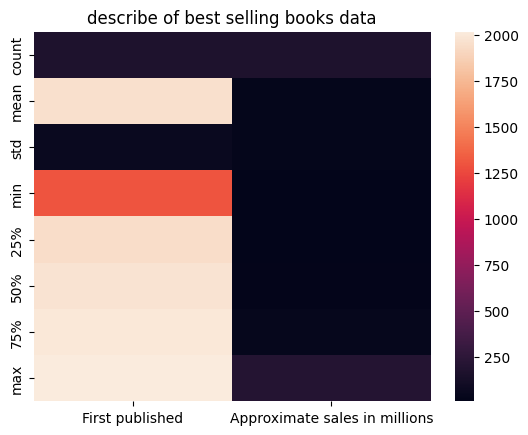

In [13]:
sns.heatmap(best_selling_books_describe)
plt.title('describe of best selling books data')
plt.show()

array([[<Axes: title={'center': 'First published'}>,
        <Axes: title={'center': 'Approximate sales in millions'}>]],
      dtype=object)

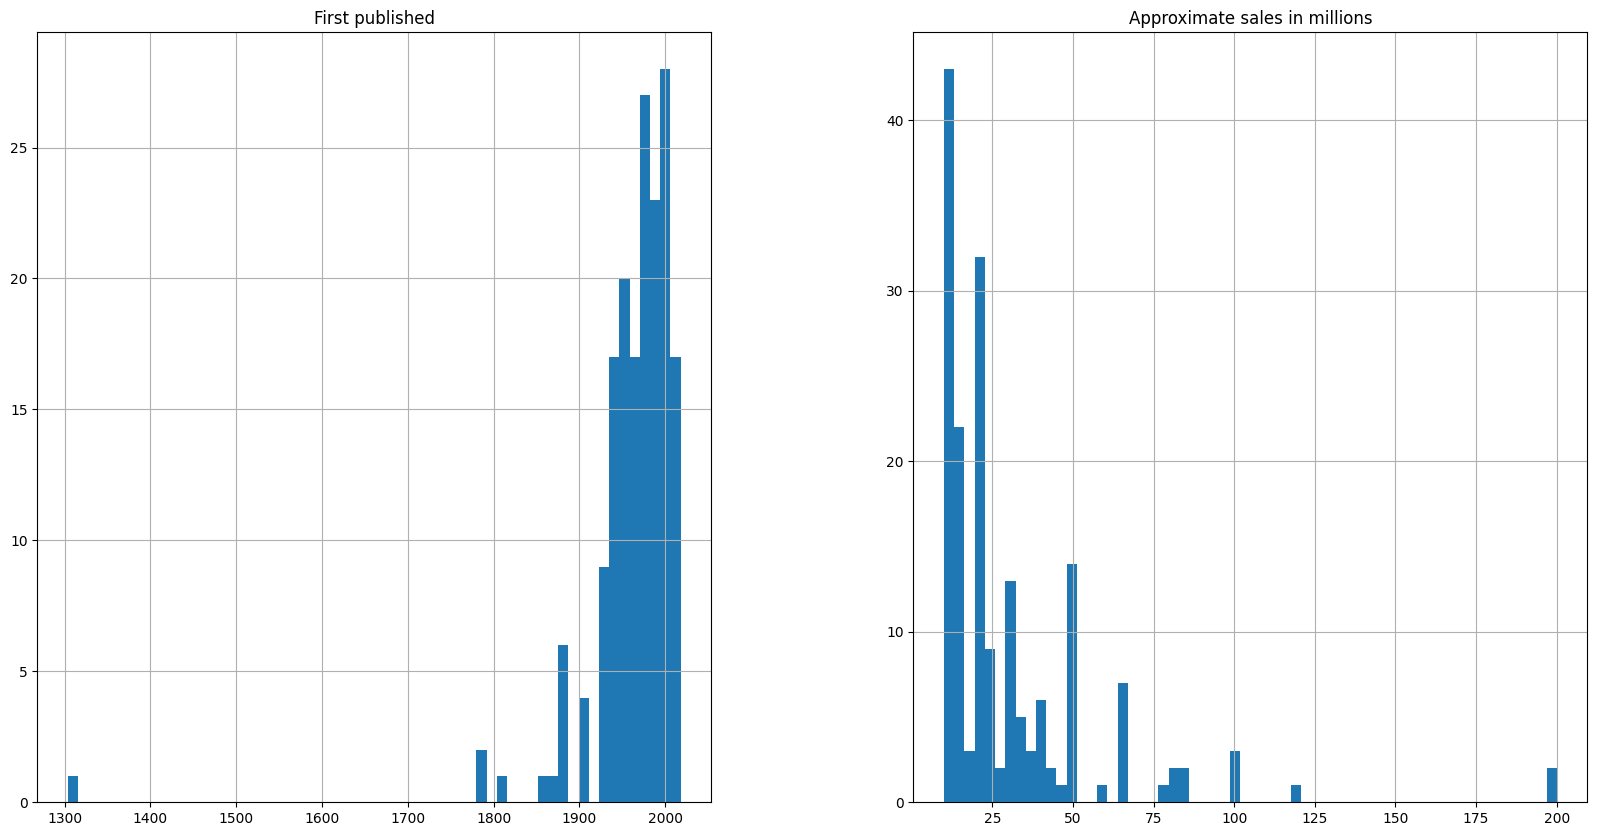

In [16]:
df.hist(bins=60,figsize= (20,10))


Counting the books of Author

<Axes: xlabel='Genre'>

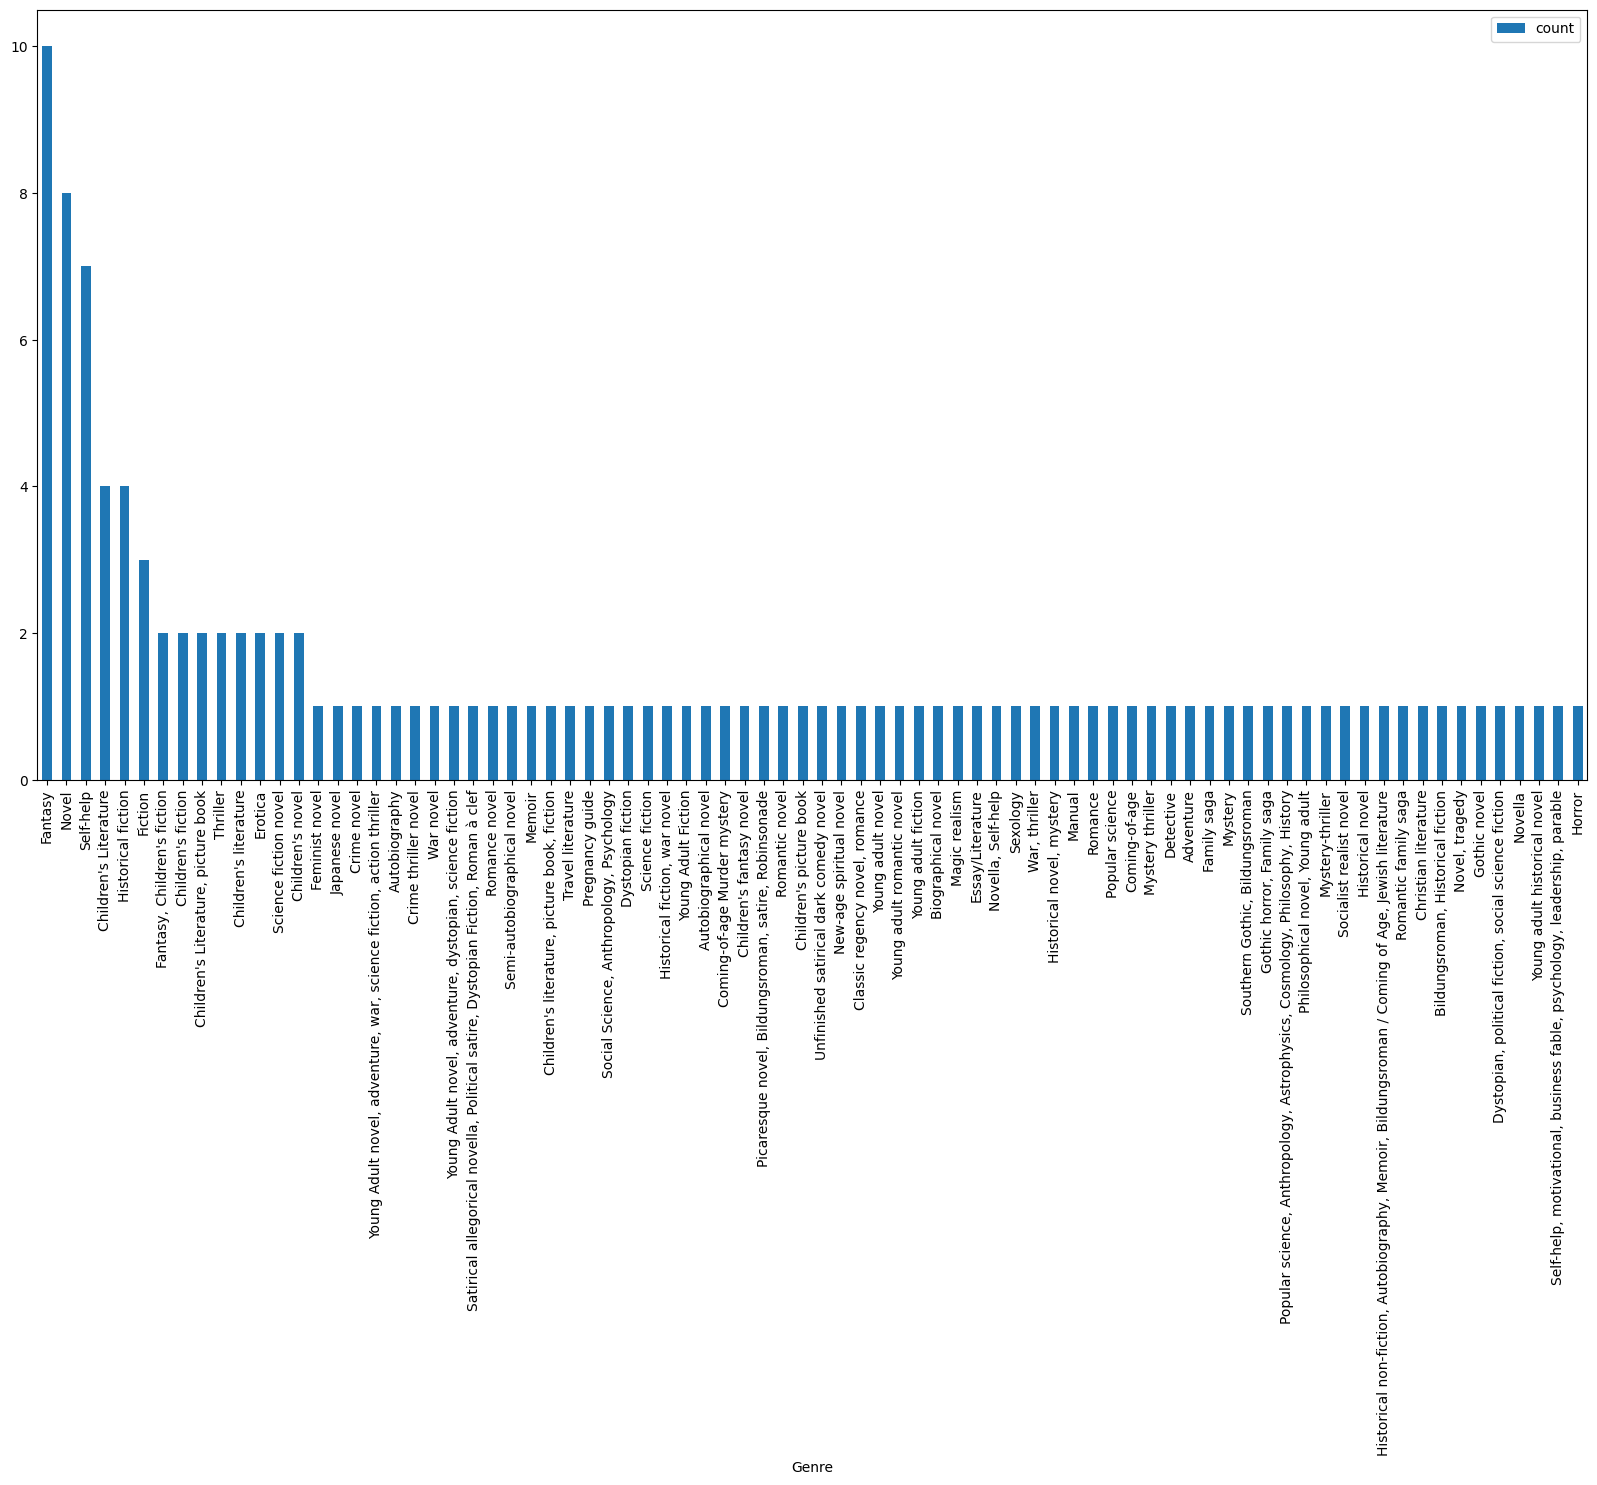

In [19]:
#create a bar plot showing the distribution of books by genre
pd.DataFrame(df['Genre'].value_counts()).plot(kind='bar', figsize=(20, 10))

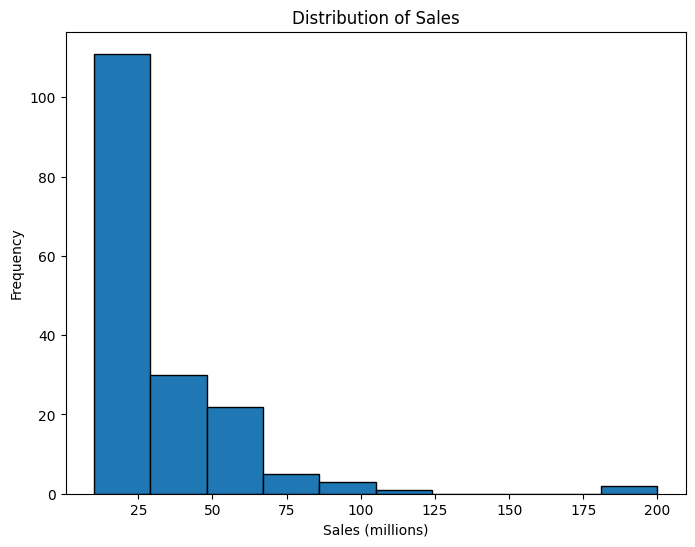

In [21]:
plt.figure(figsize=(8, 6))
plt.hist(df['Approximate sales in millions'], bins=10, edgecolor='black')
plt.xlabel('Sales (millions)')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.show()


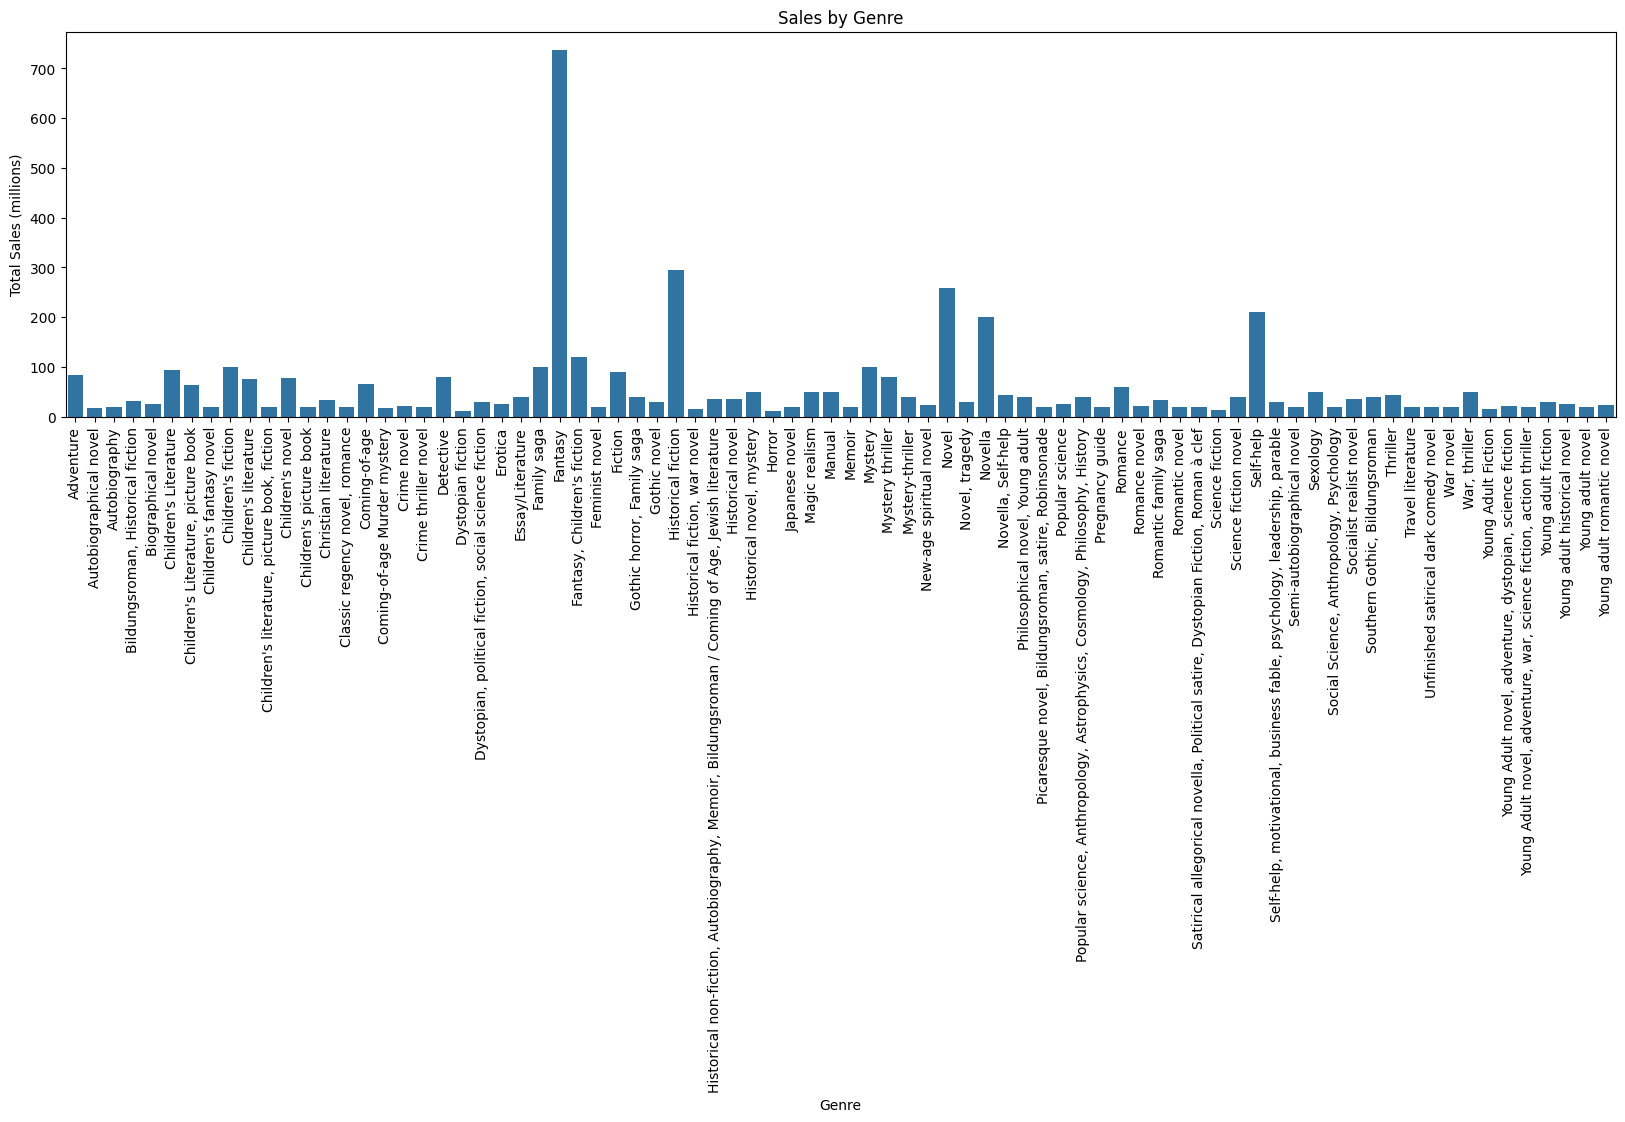

In [22]:
sales_by_genre = df.groupby('Genre')['Approximate sales in millions'].sum().reset_index()
plt.figure(figsize=(20, 5))
sns.barplot(data=sales_by_genre, x='Genre', y='Approximate sales in millions')
plt.xlabel('Genre')
plt.ylabel('Total Sales (millions)')
plt.title('Sales by Genre')
plt.xticks(rotation=90)
plt.show()

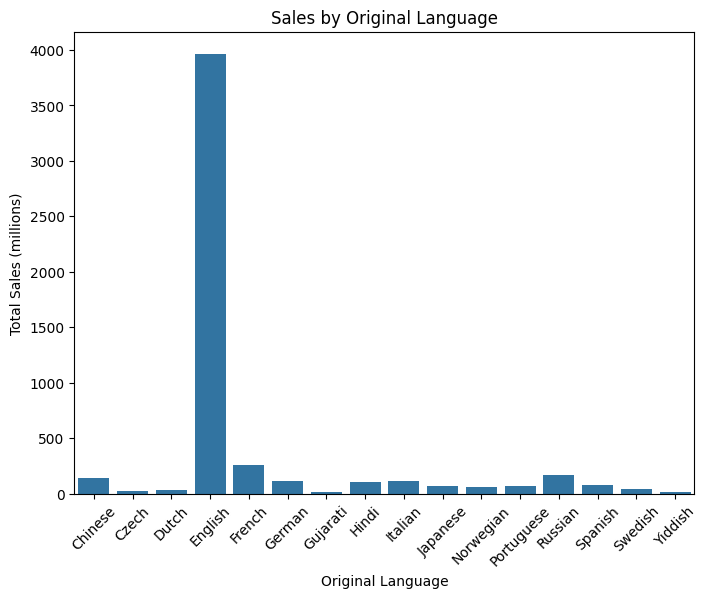

In [23]:
sales_by_language = df.groupby('Original language')['Approximate sales in millions'].sum().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=sales_by_language, x='Original language', y='Approximate sales in millions')
plt.xlabel('Original Language')
plt.ylabel('Total Sales (millions)')
plt.title('Sales by Original Language')
plt.xticks(rotation=45)
plt.show()

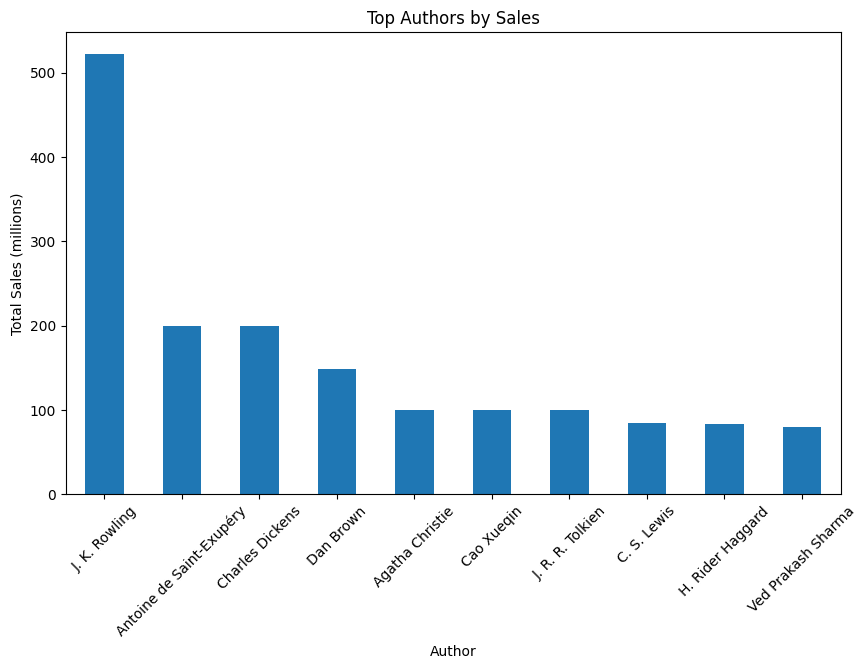

In [24]:
top_authors = df.groupby('Author(s)')['Approximate sales in millions'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
top_authors.plot(kind='bar')
plt.xlabel('Author')
plt.ylabel('Total Sales (millions)')
plt.title('Top Authors by Sales')
plt.xticks(rotation=45)
plt.show()

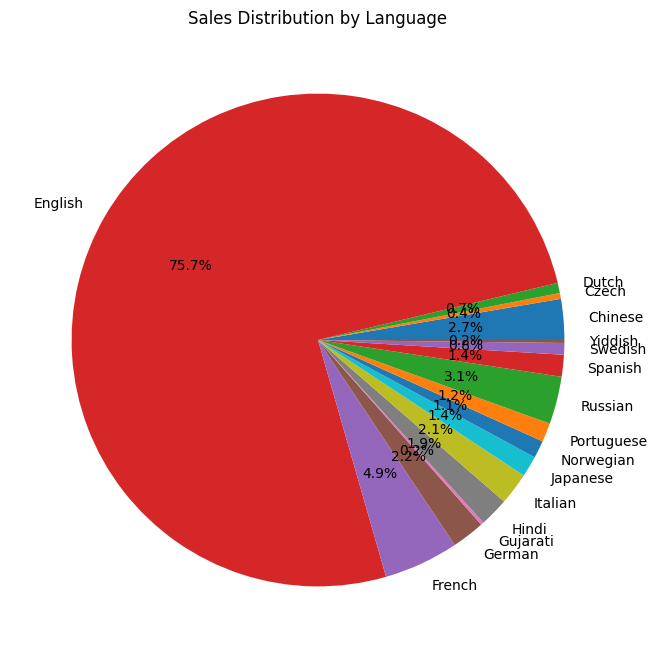

In [26]:
sales_by_language = df.groupby('Original language')['Approximate sales in millions'].sum().reset_index()
plt.figure(figsize=(8, 8))
plt.pie(sales_by_language['Approximate sales in millions'], labels=sales_by_language['Original language'], autopct='%1.1f%%')
plt.title('Sales Distribution by Language')
plt.show()

Text(0, 0.5, 'Vol Selling (Million)')

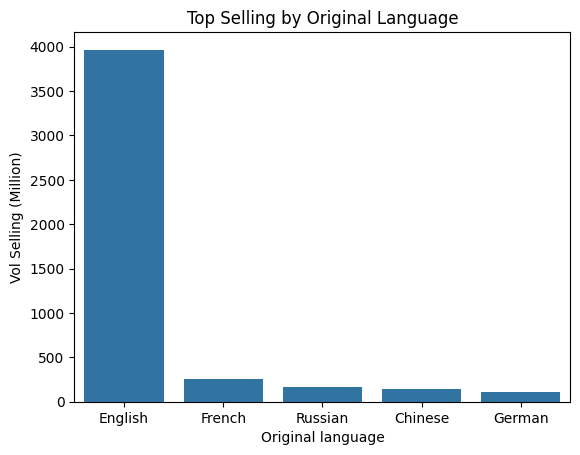

In [28]:
Lang = df.groupby('Original language')['Approximate sales in millions'].sum().reset_index().sort_values('Approximate sales in millions', ascending = False).head(5)
col = list(Lang.columns)
sns.barplot(data = Lang, x=col[0], y=col[1])
plt.title('Top Selling by Original Language')
plt.ylabel('Vol Selling (Million)')

In [ ]:
df.groupby('Author(s)')['Book'].count().sort_values(ascending=False).head()

,Book
Author(s),
J. K. Rowling,7
Suzanne Collins,3
Dan Brown,3
Roald Dahl,3
Ken Follett,2


 checking the total sales for each author's books

In [ ]:
# Group by 'Author(s)' and calculate total number of books and total sales
author_stats = df.groupby('Author(s)').agg(
    Total_Books=('Book', 'size'),
    Total_Sales_Millions=('Approximate sales in millions', 'sum')
).reset_index()

# Sort by 'Total Books' in descending order
author_stats = author_stats.sort_values(by='Total_Books', ascending=False)

author_stats.head(10)

,Author(s),Total_Books,Total_Sales_Millions
58,J. K. Rowling,7,522.0
139,Suzanne Collins,3,70.0
26,Dan Brown,3,149.0
125,Roald Dahl,3,65.0
83,Ken Follett,2,25.0
34,E. L. James,2,25.6
43,Erskine Caldwell,2,24.0
48,George Orwell,2,50.0
1,Albert Camus,2,22.0
112,Patricia Nell Warren,1,10.0


specifically checking the J. K. Rowling's books

In [ ]:
# Filter the dataset for books authored by J.K. Rowling
jk_rowling_books = df[df['Author(s)'] == 'J. K. Rowling']

# Show J.K. Rowling's books along with their sales in millions
jk_rowling_books_sales_in_millions = jk_rowling_books[['Author(s)','Book', 'Approximate sales in millions']]
jk_rowling_books_sales_in_millions


,Author(s),Book,Approximate sales in millions
2,J. K. Rowling,Harry Potter and the Philosopher's Stone,120.0
10,J. K. Rowling,Harry Potter and the Chamber of Secrets,77.0
11,J. K. Rowling,Harry Potter and the Prisoner of Azkaban,65.0
12,J. K. Rowling,Harry Potter and the Goblet of Fire,65.0
13,J. K. Rowling,Harry Potter and the Order of the Phoenix,65.0
14,J. K. Rowling,Harry Potter and the Half-Blood Prince,65.0
15,J. K. Rowling,Harry Potter and the Deathly Hallows,65.0


checking the J. K. Rowling's books genre

In [ ]:
# Show J.K. Rowling's books along with their sales in millions
jk_rowling_books_Genre = jk_rowling_books[['Author(s)','Book', 'Genre']]
jk_rowling_books_Genre


,Author(s),Book,Genre
2,J. K. Rowling,Harry Potter and the Philosopher's Stone,Fantasy
10,J. K. Rowling,Harry Potter and the Chamber of Secrets,Fantasy
11,J. K. Rowling,Harry Potter and the Prisoner of Azkaban,Fantasy
12,J. K. Rowling,Harry Potter and the Goblet of Fire,Fantasy
13,J. K. Rowling,Harry Potter and the Order of the Phoenix,Fantasy
14,J. K. Rowling,Harry Potter and the Half-Blood Prince,Fantasy
15,J. K. Rowling,Harry Potter and the Deathly Hallows,Fantasy


In [ ]:
jk_rowling_books_Genre['Genre'].unique()

array(['Fantasy'], dtype=object)

##pivot_table

In [ ]:
info_data = jk_rowling_books_sales_in_millions.pivot_table(index='Book',columns='Author(s)',values='Approximate sales in millions')
info_data

Author(s),J. K. Rowling
Book,
Harry Potter and the Chamber of Secrets,77.0
Harry Potter and the Deathly Hallows,65.0
Harry Potter and the Goblet of Fire,65.0
Harry Potter and the Half-Blood Prince,65.0
Harry Potter and the Order of the Phoenix,65.0
Harry Potter and the Philosopher's Stone,120.0
Harry Potter and the Prisoner of Azkaban,65.0


Adding new features to the pivort table

In [ ]:
info_data['sales_in_millions'] = pd.DataFrame(df.groupby('Book')['Approximate sales in millions'].sum())
info_data

Author(s),J. K. Rowling,sales_in_millions
Book,,
Harry Potter and the Chamber of Secrets,77.0,77.0
Harry Potter and the Deathly Hallows,65.0,65.0
Harry Potter and the Goblet of Fire,65.0,65.0
Harry Potter and the Half-Blood Prince,65.0,65.0
Harry Potter and the Order of the Phoenix,65.0,65.0
Harry Potter and the Philosopher's Stone,120.0,120.0
Harry Potter and the Prisoner of Azkaban,65.0,65.0


In [ ]:
info_data.groupby('Book')['sales_in_millions'].mean().sort_values(ascending=False).head(7)

,sales_in_millions
Book,
Harry Potter and the Philosopher's Stone,120.0
Harry Potter and the Chamber of Secrets,77.0
Harry Potter and the Deathly Hallows,65.0
Harry Potter and the Goblet of Fire,65.0
Harry Potter and the Half-Blood Prince,65.0
Harry Potter and the Order of the Phoenix,65.0
Harry Potter and the Prisoner of Azkaban,65.0


In [ ]:
Harry_Potter = info_data.loc["Harry Potter and the Chamber of Secrets":]
Harry_Potter

Author(s),J. K. Rowling,sales_in_millions
Book,,
Harry Potter and the Chamber of Secrets,77.0,77.0
Harry Potter and the Deathly Hallows,65.0,65.0
Harry Potter and the Goblet of Fire,65.0,65.0
Harry Potter and the Half-Blood Prince,65.0,65.0
Harry Potter and the Order of the Phoenix,65.0,65.0
Harry Potter and the Philosopher's Stone,120.0,120.0
Harry Potter and the Prisoner of Azkaban,65.0,65.0


In [ ]:
similar_to_Harry_Potter = info_data.corrwith(Harry_Potter)

In [ ]:
corr_Harry_Potter = pd.DataFrame(similar_to_Harry_Potter,columns=['Correlation'])
corr_Harry_Potter

,Correlation
Author(s),
J. K. Rowling,1.0
sales_in_millions,1.0


In [ ]:
corr_Harry_Potter = pd.concat([corr_Harry_Potter, info_data['sales_in_millions']], axis=1) # Use pd.concat to join the DataFrame and Series. Use axis=1 to concatenate along columns
corr_Harry_Potter

,Correlation,sales_in_millions
J. K. Rowling,1.0,NaN
sales_in_millions,1.0,NaN
Harry Potter and the Chamber of Secrets,NaN,77.0
Harry Potter and the Deathly Hallows,NaN,65.0
Harry Potter and the Goblet of Fire,NaN,65.0
Harry Potter and the Half-Blood Prince,NaN,65.0
Harry Potter and the Order of the Phoenix,NaN,65.0
Harry Potter and the Philosopher's Stone,NaN,120.0
Harry Potter and the Prisoner of Azkaban,NaN,65.0


In [ ]:
corr_Harry_Potter[corr_Harry_Potter['sales_in_millions']>65].sort_values('Correlation',ascending=False)

,Correlation,sales_in_millions
Harry Potter and the Chamber of Secrets,NaN,77.0
Harry Potter and the Philosopher's Stone,NaN,120.0


In [ ]:
corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['Correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar = corr_liarliar.join(ratings['num of ratings'])
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation',ascending=False).head()

In [ ]:
corr_Harry_Potter = pd.DataFrame(similar_to_Harry_Potter,columns=['Correlation'])
corr_Harry_Potter = corr_Harry_Potter.join(info_data['sales_in_millions'])
corr_Harry_Potter[corr_Harry_Potter['sales_in_millions']>65].sort_values('Correlation',ascending=False)

,Correlation,sales_in_millions
Author(s),,
